In [1]:
import pandas as pd
import json 
import requests
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('fishdata.csv',engine='python')
df

,Year,Month,Day,Hour,Minute,Second,Carbon Monoxide,External temperature,PM2.5,External temp,Humidity,Internal temperature
0,2020.0,6.0,18,14,30.0,33.0,qCBrs9¥ †R! „Â¤‡cäÍFóInitializing.... Please W...,NaN,NaN,NaN,NaN,NaN
1,2020.0,6.0,18,14,30.0,43.0,201,25.0,29.0,95.00,27.19,4.39
2,2020.0,6.0,18,14,30.0,48.0,201,25.0,29.0,95.00,27.19,4.38
3,2020.0,6.0,18,14,31.0,3.0,201,25.0,29.0,95.00,27.19,4.38
4,2020.0,6.0,18,14,31.0,8.0,201,25.0,29.0,95.00,27.19,4.41
...,...,...,...,...,...,...,...,...,...,...,...,...
811942,2020.0,10.0,19,8,24.0,4.0,201,-165.0,25.0,95.00,25.94,4.17
811943,2020.0,10.0,19,8,24.0,8.0,201,-167.0,25.0,95.00,25.94,4.19
811944,2020.0,10.0,19,8,24.0,13.0,-168,25.0,95.0,25.94,4.18,NaN
811945,2020.0,10.0,19,8,24.0,16.0,201,-169.0,25.0,95.00,25.94,4.17


In [3]:
df.isnull()

,Year,Month,Day,Hour,Minute,Second,Carbon Monoxide,External temperature,PM2.5,External temp,Humidity,Internal temperature
0,False,False,False,False,False,False,False,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
811942,False,False,False,False,False,False,False,False,False,False,False,False
811943,False,False,False,False,False,False,False,False,False,False,False,False
811944,False,False,False,False,False,False,False,False,False,False,False,True
811945,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()

Year                       0
Month                      0
Day                        0
Hour                       0
Minute                     0
Second                     0
Carbon Monoxide         1748
External temperature      75
PM2.5                     96
External temp            104
Humidity                 104
Internal temperature    4539
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811947 entries, 0 to 811946
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Year                  811947 non-null  float64
 1   Month                 811947 non-null  float64
 2   Day                   811947 non-null  int64  
 3   Hour                  811947 non-null  int64  
 4   Minute                811947 non-null  float64
 5   Second                811947 non-null  float64
 6   Carbon Monoxide       810199 non-null  object 
 7   External temperature  811872 non-null  float64
 8   PM2.5                 811851 non-null  float64
 9   External temp         811843 non-null  float64
 10  Humidity              811843 non-null  float64
 11  Internal temperature  807408 non-null  float64
dtypes: float64(9), int64(2), object(1)
memory usage: 74.3+ MB


In [6]:
df['Carbon Monoxide'] = df['Carbon Monoxide'].apply(pd.to_numeric, errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811947 entries, 0 to 811946
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Year                  811947 non-null  float64
 1   Month                 811947 non-null  float64
 2   Day                   811947 non-null  int64  
 3   Hour                  811947 non-null  int64  
 4   Minute                811947 non-null  float64
 5   Second                811947 non-null  float64
 6   Carbon Monoxide       810195 non-null  float64
 7   External temperature  811872 non-null  float64
 8   PM2.5                 811851 non-null  float64
 9   External temp         811843 non-null  float64
 10  Humidity              811843 non-null  float64
 11  Internal temperature  807408 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 74.3 MB


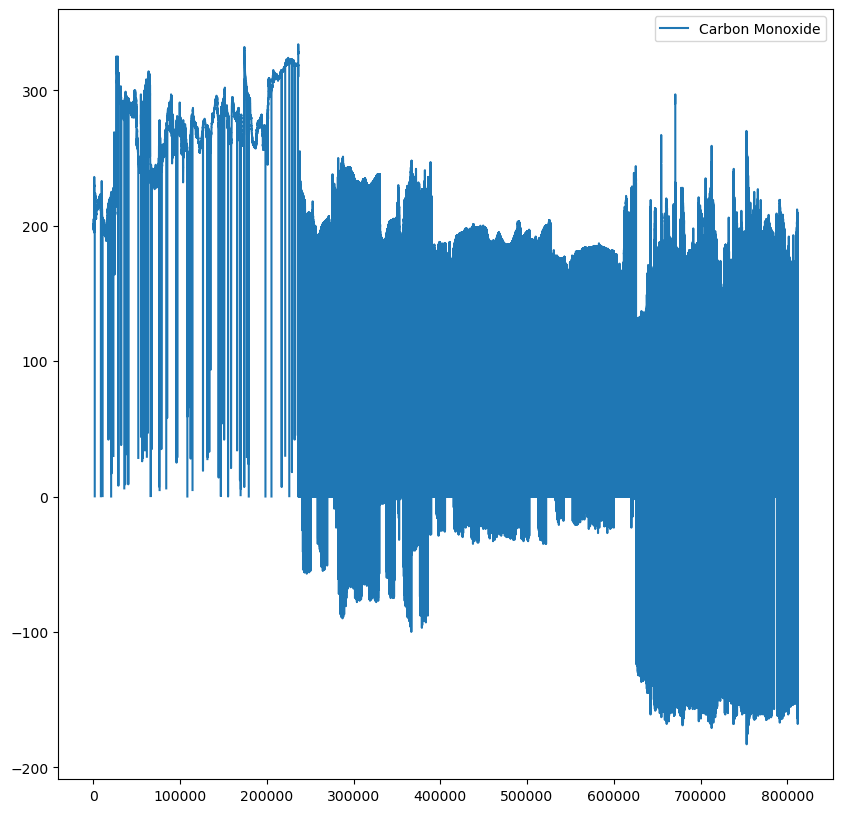

In [8]:
df.plot(y='Carbon Monoxide' , use_index = True, figsize =(10,10))
plt.show()

In [10]:
df.dropna(inplace =True)

In [11]:
df.isnull().sum()

Year                    0
Month                   0
Day                     0
Hour                    0
Minute                  0
Second                  0
Carbon Monoxide         0
External temperature    0
PM2.5                   0
External temp           0
Humidity                0
Internal temperature    0
dtype: int64

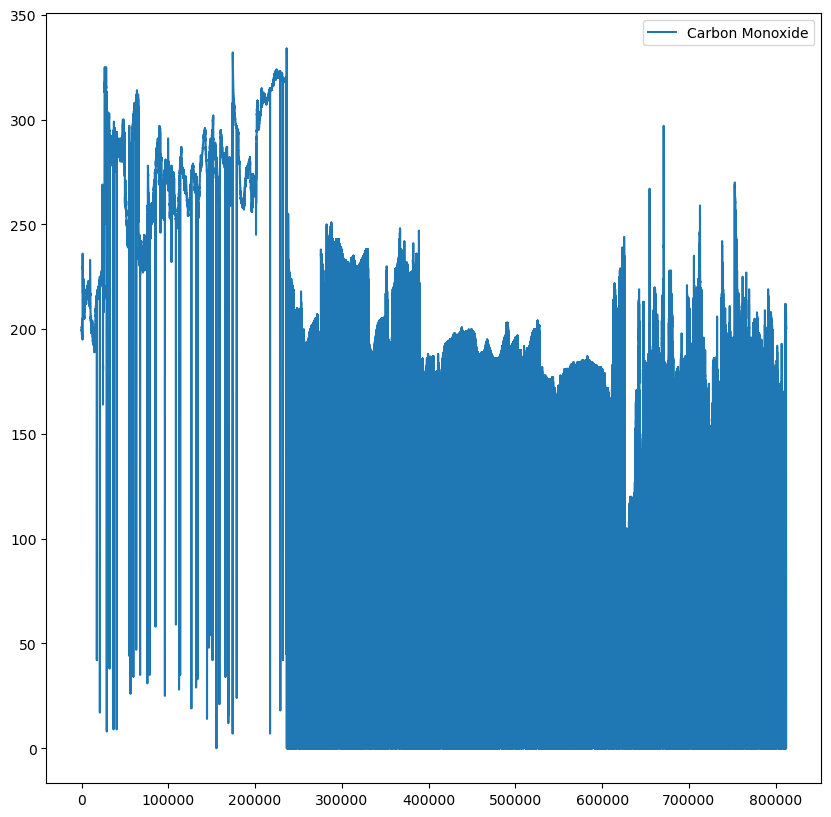

In [15]:
df.plot(y='Carbon Monoxide' , use_index = True, figsize =(10,10))
plt.show()